In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV


In [2]:
sal=pd.read_csv(r"C:\Users\Vikas Salunke\Desktop\Data Science\SalaryData_Test.csv")
sal


,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [3]:
sal_te=sal_t=pd.read_csv(r"C:\Users\Vikas Salunke\Desktop\Data Science\SalaryData_Train.csv")
sal_te

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
sal.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [5]:
sal_te.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
sal.shape

(15060, 14)

In [7]:
sal_te.shape

(30161, 14)

In [ ]:
sal.head()

In [8]:
sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [9]:
sal_te.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [10]:
sal.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


In [11]:
sal_te.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [12]:
sal.corr()

,age,educationno,capitalgain,capitalloss,hoursperweek
age,1.000000,0.026123,0.078760,0.057745,0.102758
educationno,0.026123,1.000000,0.131750,0.085817,0.133691
capitalgain,0.078760,0.131750,1.000000,-0.031876,0.090501
capitalloss,0.057745,0.085817,-0.031876,1.000000,0.057712
hoursperweek,0.102758,0.133691,0.090501,0.057712,1.000000


In [13]:
sal_te.corr()

,age,educationno,capitalgain,capitalloss,hoursperweek
age,1.000000,0.043525,0.080152,0.060278,0.101598
educationno,0.043525,1.000000,0.124416,0.079691,0.152522
capitalgain,0.080152,0.124416,1.000000,-0.032218,0.080431
capitalloss,0.060278,0.079691,-0.032218,1.000000,0.052454
hoursperweek,0.101598,0.152522,0.080431,0.052454,1.000000


In [14]:
lb = LabelEncoder()

In [16]:
sal["workclass"] = lb.fit_transform(sal["workclass"])
sal["education"] = lb.fit_transform(sal["education"])
sal["maritalstatus"] = lb.fit_transform(sal["maritalstatus"])
sal["occupation"] = lb.fit_transform(sal["occupation"])
sal["relationship"] = lb.fit_transform(sal["relationship"])
sal["race"] = lb.fit_transform(sal["race"])
sal["sex"] = lb.fit_transform(sal["sex"])
sal["native"] = lb.fit_transform(sal["native"])
sal["Salary"] = lb.fit_transform(sal["Salary"])

In [17]:
sal_te["workclass"] = lb.fit_transform(sal_te["workclass"])
sal_te["education"] = lb.fit_transform(sal_te["education"])
sal_te["maritalstatus"] = lb.fit_transform(sal_te["maritalstatus"])
sal_te["occupation"] = lb.fit_transform(sal_te["occupation"])
sal_te["relationship"] = lb.fit_transform(sal_te["relationship"])
sal_te["race"] = lb.fit_transform(sal_te["race"])
sal_te["sex"] = lb.fit_transform(sal_te["sex"])
sal_te["native"] = lb.fit_transform(sal_te["native"])
sal_te["Salary"] = lb.fit_transform(sal_te["Salary"])

In [18]:
sal = sal.iloc[: 2000, :]

In [19]:
sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            2000 non-null   int64
 1   workclass      2000 non-null   int32
 2   education      2000 non-null   int32
 3   educationno    2000 non-null   int64
 4   maritalstatus  2000 non-null   int32
 5   occupation     2000 non-null   int32
 6   relationship   2000 non-null   int32
 7   race           2000 non-null   int32
 8   sex            2000 non-null   int32
 9   capitalgain    2000 non-null   int64
 10  capitalloss    2000 non-null   int64
 11  hoursperweek   2000 non-null   int64
 12  native         2000 non-null   int32
 13  Salary         2000 non-null   int32
dtypes: int32(9), int64(5)
memory usage: 148.6 KB


In [20]:
sal_te = sal_te.iloc[: 1300, :]

In [21]:
sal_te.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            1300 non-null   int64
 1   workclass      1300 non-null   int32
 2   education      1300 non-null   int32
 3   educationno    1300 non-null   int64
 4   maritalstatus  1300 non-null   int32
 5   occupation     1300 non-null   int32
 6   relationship   1300 non-null   int32
 7   race           1300 non-null   int32
 8   sex            1300 non-null   int32
 9   capitalgain    1300 non-null   int64
 10  capitalloss    1300 non-null   int64
 11  hoursperweek   1300 non-null   int64
 12  native         1300 non-null   int32
 13  Salary         1300 non-null   int32
dtypes: int32(9), int64(5)
memory usage: 96.6 KB


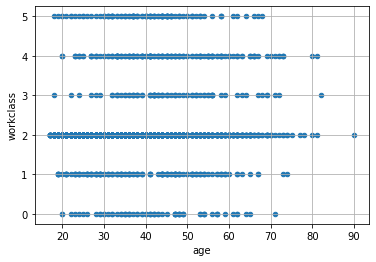

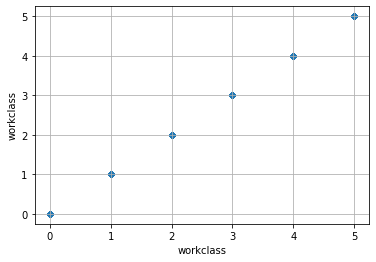

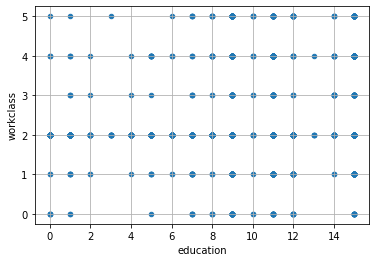

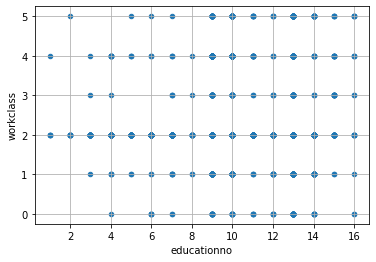

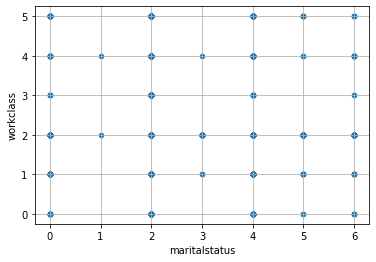

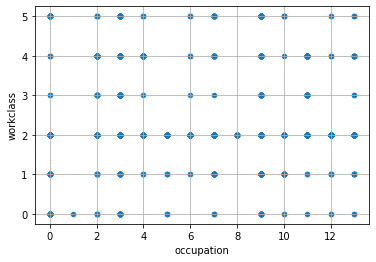

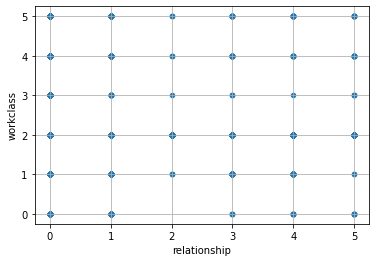

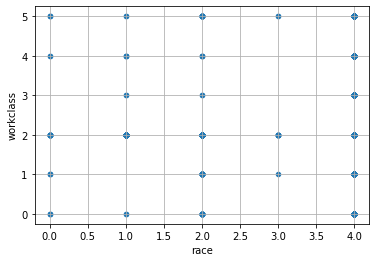

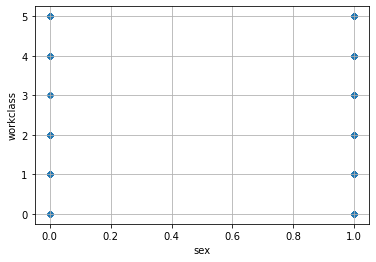

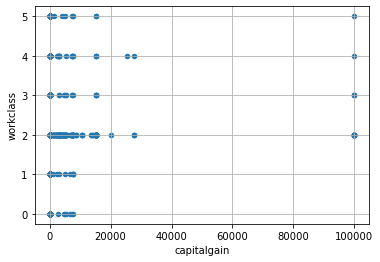

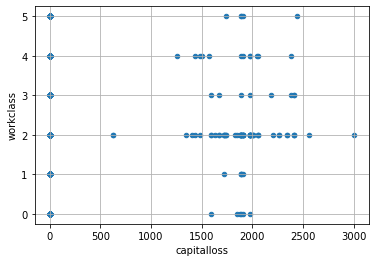

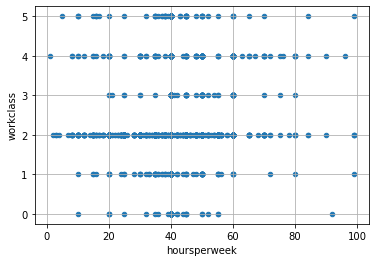

In [22]:
for i in sal.describe().columns[:-2]:
    sal.plot.scatter(i,'workclass',grid=True)

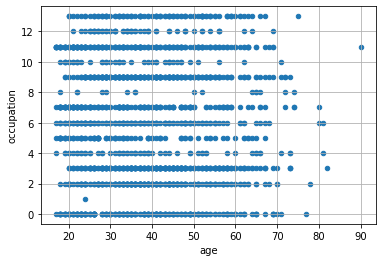

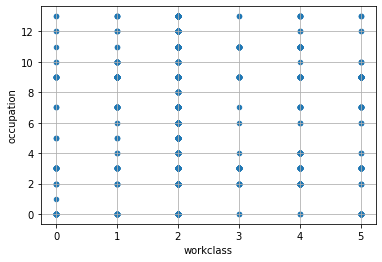

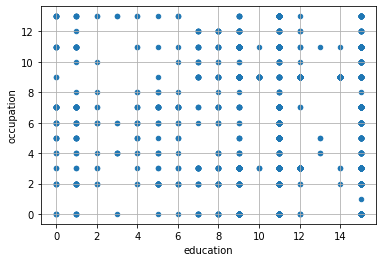

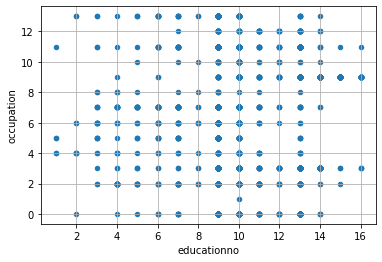

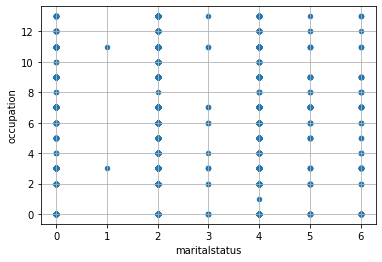

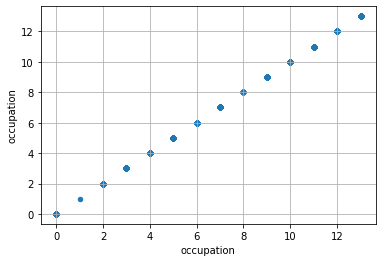

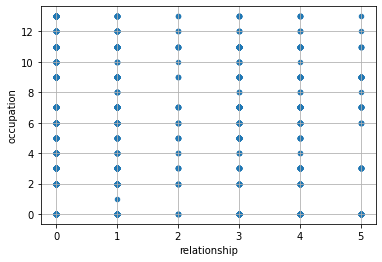

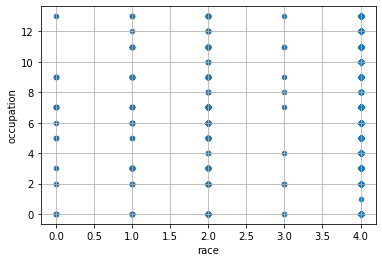

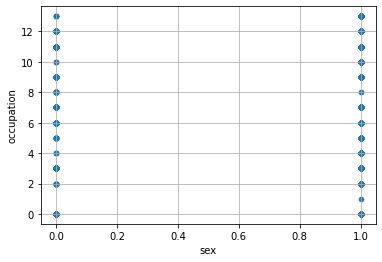

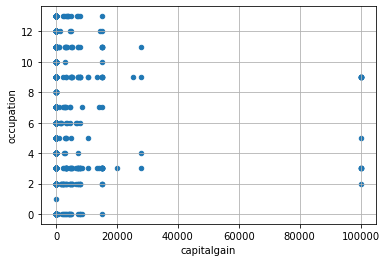

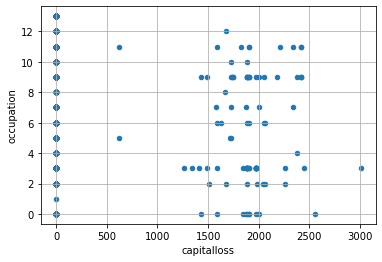

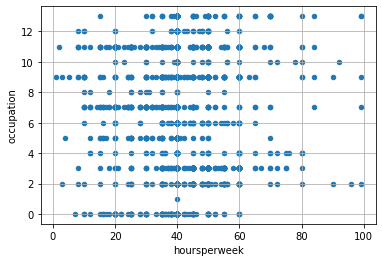

In [23]:
for i in sal.describe().columns[:-2]:
    sal.plot.scatter(i,'occupation',grid=True)

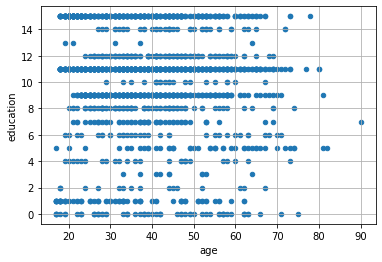

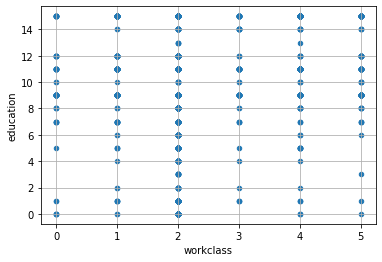

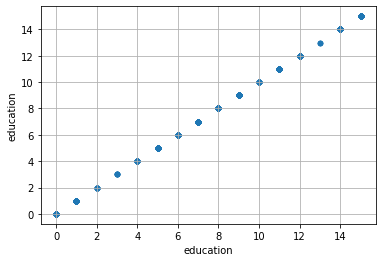

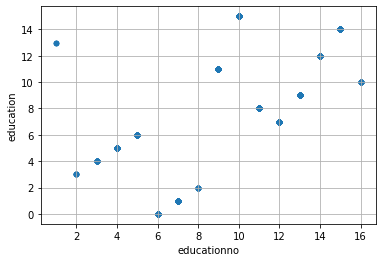

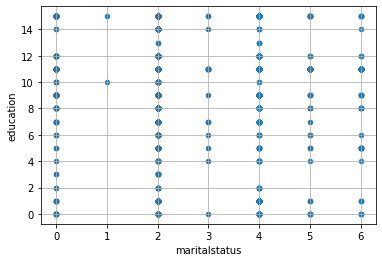

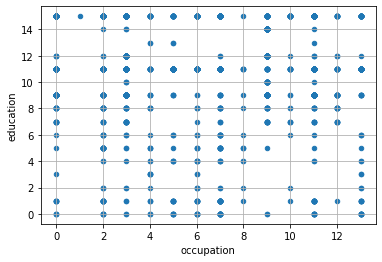

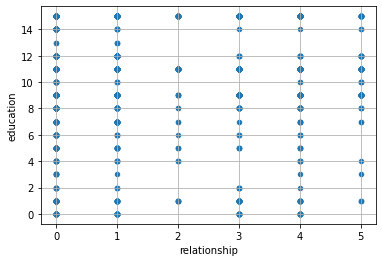

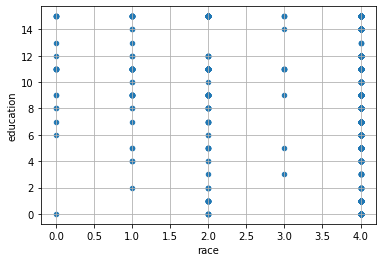

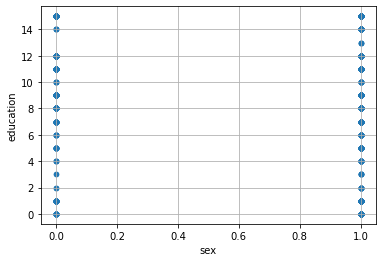

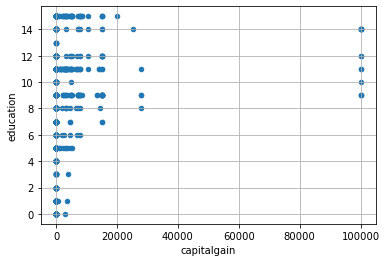

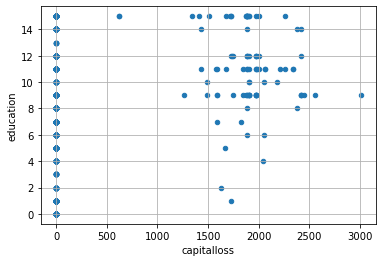

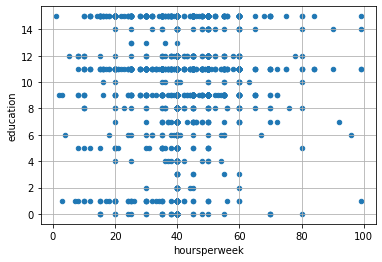

In [24]:
for i in sal.describe().columns[:-2]:
    sal.plot.scatter(i,'education',grid=True)

In [25]:
sal.corr()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
age,1.000000,0.102145,-0.067663,-0.010577,-0.264971,-0.032433,-0.235359,0.013387,0.052985,0.080818,0.066299,0.089758,0.028632,0.202369
workclass,0.102145,1.000000,0.072303,0.071085,-0.043540,0.020685,-0.060904,0.049746,0.047493,0.035666,0.021972,0.084331,0.010883,0.057715
education,-0.067663,0.072303,1.000000,0.380574,-0.045008,-0.027401,-0.021588,-0.000134,-0.012436,0.053427,0.039619,0.043915,0.082684,0.107446
educationno,-0.010577,0.071085,0.380574,1.000000,-0.079547,0.079451,-0.051236,0.065272,-0.006249,0.149532,0.111272,0.136683,0.131089,0.330302
maritalstatus,-0.264971,-0.043540,-0.045008,-0.079547,1.000000,-0.027786,0.175039,-0.052516,-0.146937,-0.053283,-0.006086,-0.160026,0.003382,-0.205593
occupation,-0.032433,0.020685,-0.027401,0.079451,-0.027786,1.000000,-0.060867,0.019798,0.062337,0.007396,-0.025065,0.021000,-0.004707,0.013167
relationship,-0.235359,-0.060904,-0.021588,-0.051236,0.175039,-0.060867,1.000000,-0.152606,-0.581357,-0.062047,-0.020785,-0.294024,-0.005507,-0.246045
race,0.013387,0.049746,-0.000134,0.065272,-0.052516,0.019798,-0.152606,1.000000,0.089352,0.007659,0.052039,0.044072,0.147434,0.061567
sex,0.052985,0.047493,-0.012436,-0.006249,-0.146937,0.062337,-0.581357,0.089352,1.000000,0.064832,0.044939,0.264457,-0.025018,0.213186
capitalgain,0.080818,0.035666,0.053427,0.149532,-0.053283,0.007396,-0.062047,0.007659,0.064832,1.000000,-0.034039,0.109488,0.030871,0.236209


In [26]:
sal_te.corr()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
age,1.000000,0.082810,-0.012805,0.023470,-0.242071,-0.008795,-0.222348,0.012393,0.069420,0.094467,0.069359,0.112294,-0.007457,0.235566
workclass,0.082810,1.000000,0.031016,0.081318,-0.045448,0.030169,-0.084738,0.073059,0.101236,0.018042,0.038669,0.029552,-0.022266,0.058983
education,-0.012805,0.031016,1.000000,0.279357,-0.076233,-0.028124,-0.029600,-0.001655,0.001206,0.033709,-0.019719,0.079229,0.085891,0.027085
educationno,0.023470,0.081318,0.279357,1.000000,-0.069777,0.129528,-0.105861,0.062739,0.034932,0.123991,0.059936,0.186050,0.067545,0.325273
maritalstatus,-0.242071,-0.045448,-0.076233,-0.069777,1.000000,0.080904,0.154737,-0.084844,-0.080972,-0.057645,-0.016282,-0.213946,0.000091,-0.199889
occupation,-0.008795,0.030169,-0.028124,0.129528,0.080904,1.000000,-0.052499,0.050838,0.055835,-0.004173,0.019042,0.021919,0.011225,0.021842
relationship,-0.222348,-0.084738,-0.029600,-0.105861,0.154737,-0.052499,1.000000,-0.100516,-0.564539,-0.089995,-0.024553,-0.272978,-0.064700,-0.205675
race,0.012393,0.073059,-0.001655,0.062739,-0.084844,0.050838,-0.100516,1.000000,0.094750,-0.019131,0.021858,0.052252,0.127940,0.072880
sex,0.069420,0.101236,0.001206,0.034932,-0.080972,0.055835,-0.564539,0.094750,1.000000,0.048749,0.034700,0.211010,0.035955,0.177952
capitalgain,0.094467,0.018042,0.033709,0.123991,-0.057645,-0.004173,-0.089995,-0.019131,0.048749,1.000000,-0.036307,0.082818,-0.009522,0.226239


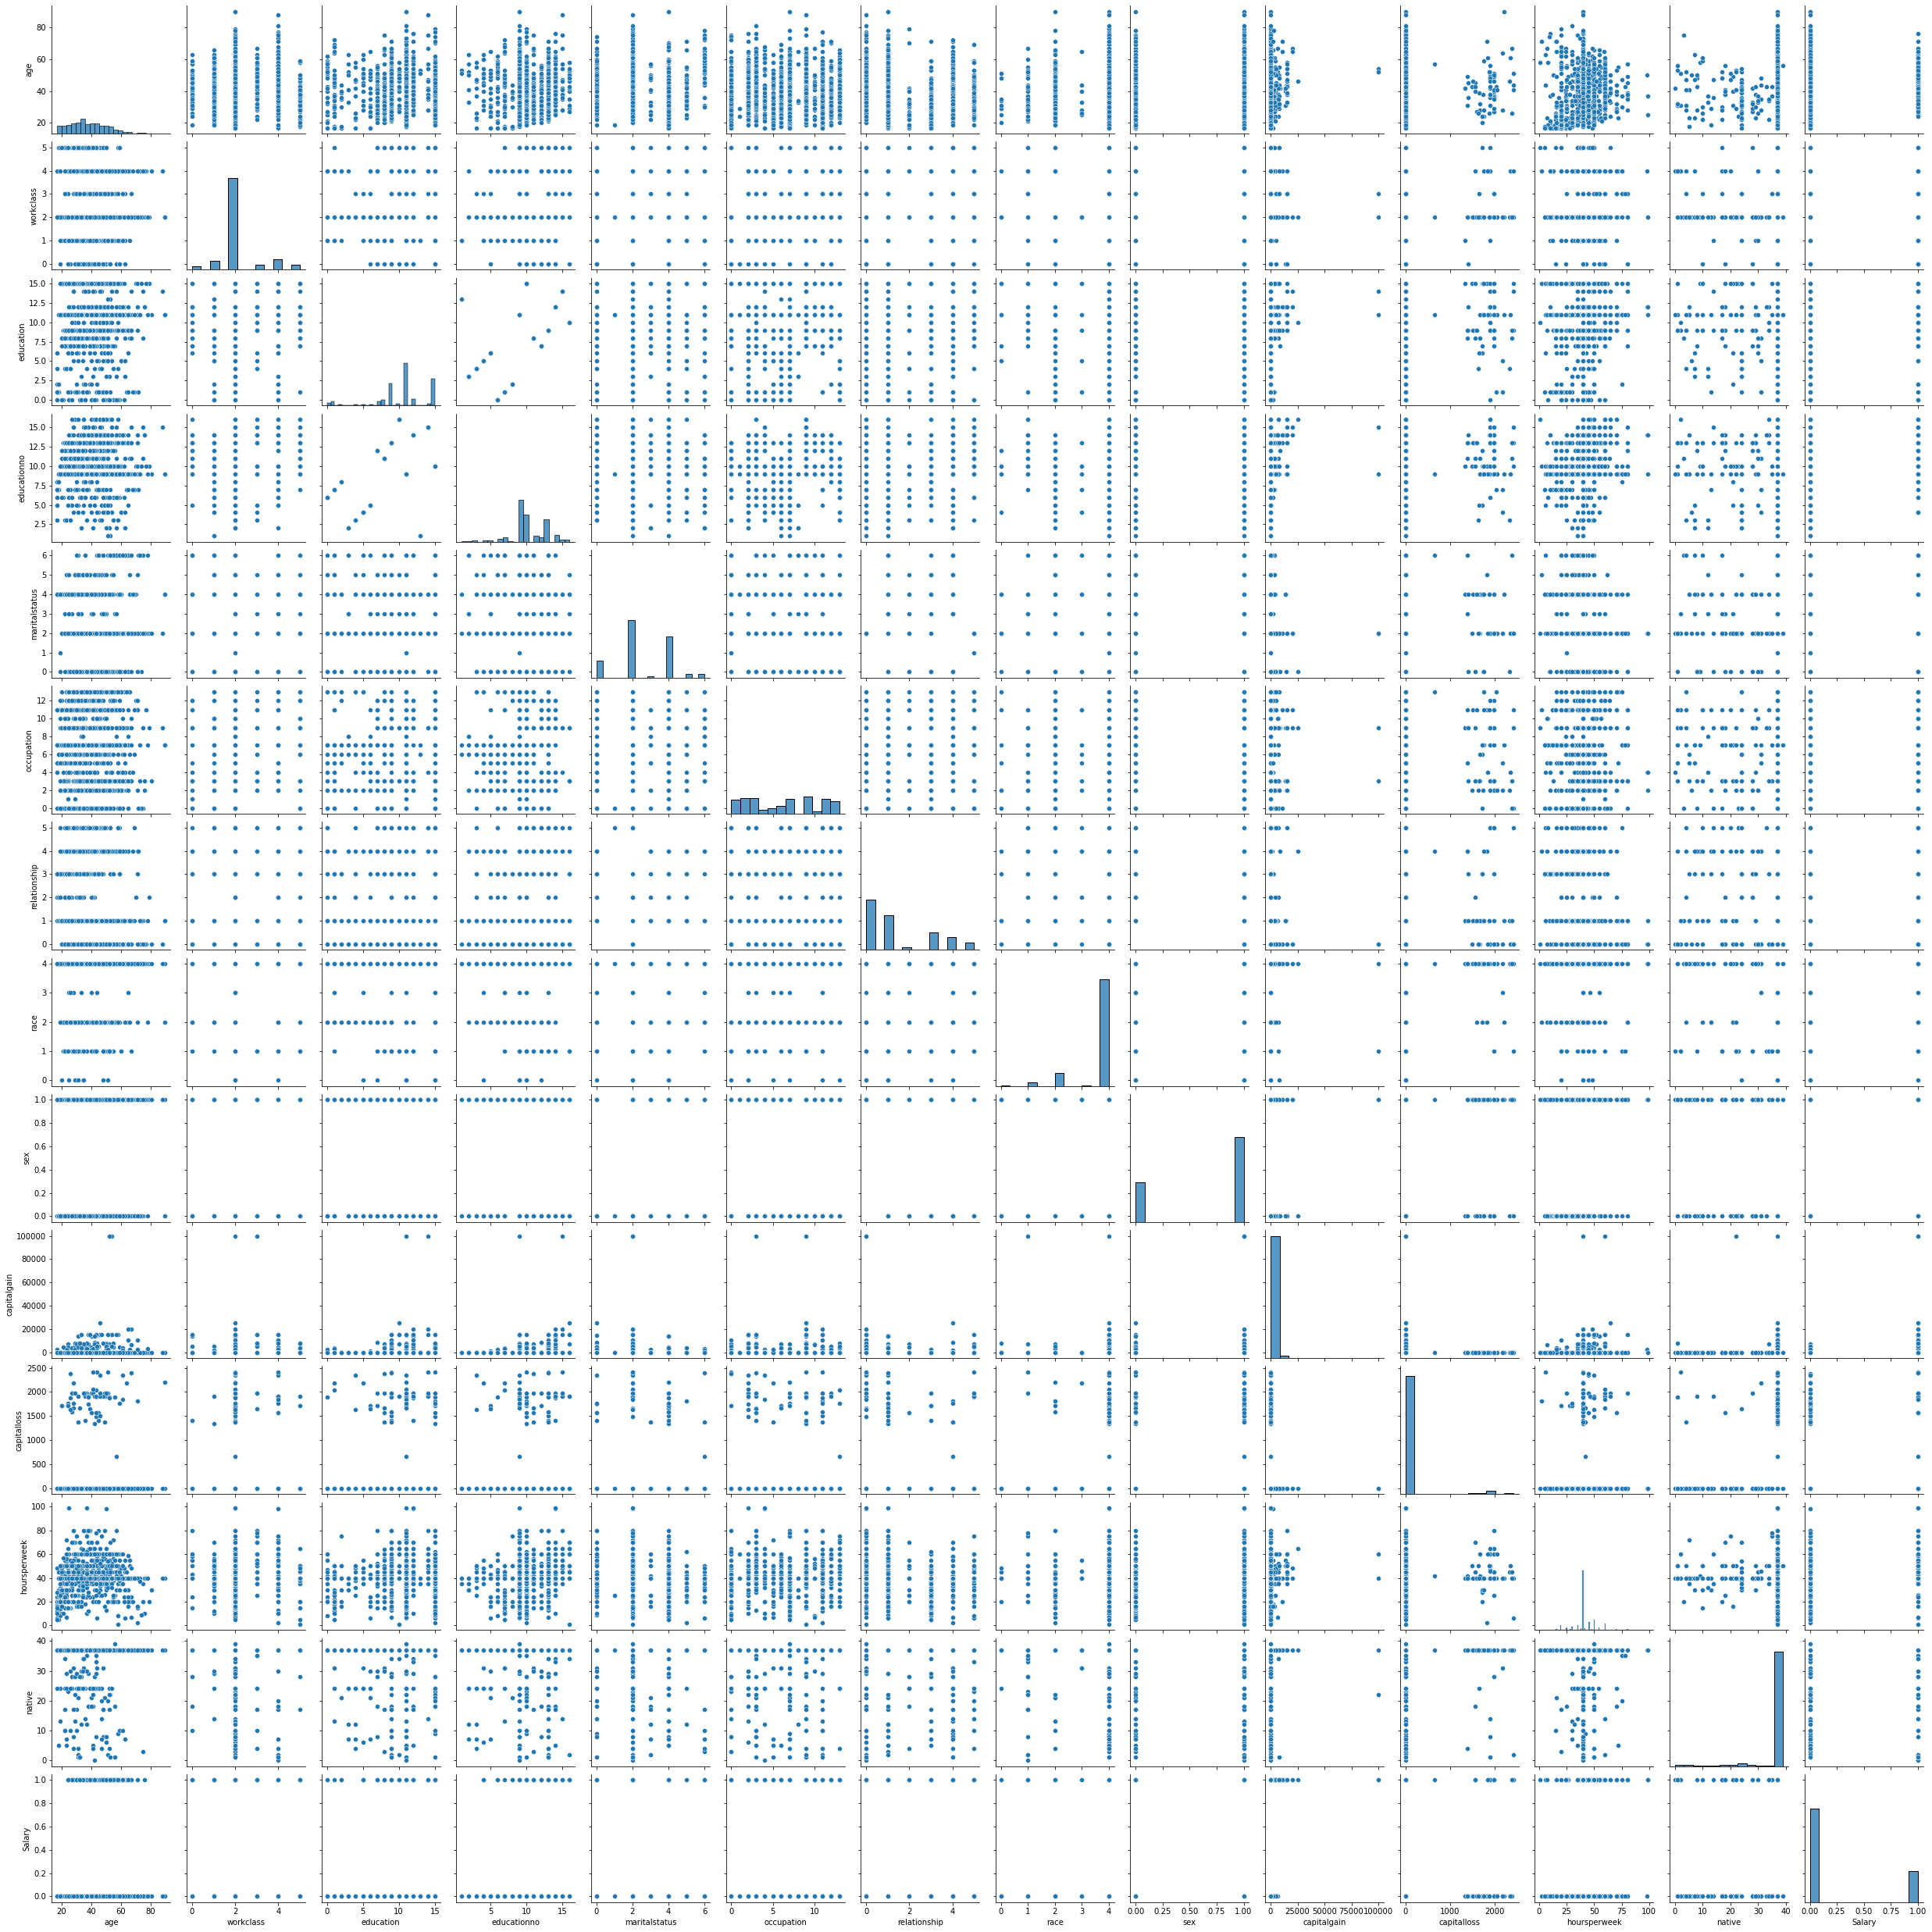

In [27]:
sns.pairplot(sal_te)

In [28]:
X_train=sal.iloc[:,:-1]
X_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,25,2,1,7,4,6,3,2,1,0,0,40,37
1,38,2,11,9,2,4,0,4,1,0,0,50,37
2,28,1,7,12,2,10,0,4,1,0,0,40,37
3,44,2,15,10,2,6,0,2,1,7688,0,40,37
4,34,2,0,6,4,7,1,4,1,0,0,30,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,35,5,8,11,4,2,1,4,1,0,0,40,37
1996,41,2,15,10,2,2,0,4,1,0,0,45,37
1997,43,4,9,13,4,11,3,4,1,0,0,35,37
1998,49,3,14,15,2,9,0,4,1,0,0,40,37


In [29]:
y_train=sal.iloc[:,-1]
y_train

0       0
1       0
2       1
3       1
4       0
       ..
1995    0
1996    0
1997    0
1998    1
1999    1
Name: Salary, Length: 2000, dtype: int32

In [30]:
X_test=sal_te.iloc[:,:-1]
X_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,39,5,9,13,4,0,1,4,1,2174,0,40,37
1,50,4,9,13,2,3,0,4,1,0,0,13,37
2,38,2,11,9,0,5,1,4,1,0,0,40,37
3,53,2,1,7,2,5,0,2,1,0,0,40,37
4,28,2,9,13,2,9,5,2,0,0,0,40,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,43,3,11,9,2,7,0,1,1,0,0,78,35
1296,39,2,9,13,2,9,0,4,1,0,0,40,37
1297,53,2,15,10,2,3,0,4,1,0,0,45,37
1298,52,4,0,6,2,3,0,4,1,0,0,60,37


In [31]:
y_test = sal_te.iloc[:,-1]
y_test

0       0
1       0
2       0
3       0
4       0
       ..
1295    0
1296    1
1297    1
1298    0
1299    0
Name: Salary, Length: 1300, dtype: int32

In [32]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2000, 13), (2000,), (1300, 13), (1300,))

In [33]:
model = SVC()

model.fit(X_train, y_train)


SVC()

In [34]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [35]:
print(confusion_matrix(y_test, y_pred))

[[965  11]
 [259  65]]


In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.99      0.88       976
           1       0.86      0.20      0.32       324

    accuracy                           0.79      1300
   macro avg       0.82      0.59      0.60      1300
weighted avg       0.81      0.79      0.74      1300



In [37]:
param_grid = {'C' : [1, 5, 10, 15, 20], 'gamma' : [1, 0.1, 0.01, 0.001, 0.0001], 'kernel' : ['rbf']}

In [40]:
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3,  cv = 5)

In [41]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.757 total time=   0.6s
[CV 2/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.750 total time=   0.6s
[CV 3/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.750 total time=   0.6s
[CV 4/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.745 total time=   0.5s
[CV 5/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.752 total time=   0.6s
[CV 1/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.752 total time=   0.5s
[CV 2/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.745 total time=   0.5s
[CV 3/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.738 total time=   0.9s
[CV 4/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.755 total time=   0.6s
[CV 5/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.750 total time=   0.6s
[CV 1/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.792 total time=   0.4s
[CV 2/5] END .......C=1, gamma=0.01, kernel=rbf

[CV 2/5] END .........C=20, gamma=1, kernel=rbf;, score=0.750 total time=   0.6s
[CV 3/5] END .........C=20, gamma=1, kernel=rbf;, score=0.745 total time=   0.6s
[CV 4/5] END .........C=20, gamma=1, kernel=rbf;, score=0.748 total time=   0.5s
[CV 5/5] END .........C=20, gamma=1, kernel=rbf;, score=0.755 total time=   0.6s
[CV 1/5] END .......C=20, gamma=0.1, kernel=rbf;, score=0.748 total time=   0.6s
[CV 2/5] END .......C=20, gamma=0.1, kernel=rbf;, score=0.740 total time=   0.8s
[CV 3/5] END .......C=20, gamma=0.1, kernel=rbf;, score=0.730 total time=   0.6s
[CV 4/5] END .......C=20, gamma=0.1, kernel=rbf;, score=0.738 total time=   0.6s
[CV 5/5] END .......C=20, gamma=0.1, kernel=rbf;, score=0.755 total time=   0.6s
[CV 1/5] END ......C=20, gamma=0.01, kernel=rbf;, score=0.775 total time=   0.4s
[CV 2/5] END ......C=20, gamma=0.01, kernel=rbf;, score=0.767 total time=   0.3s
[CV 3/5] END ......C=20, gamma=0.01, kernel=rbf;, score=0.807 total time=   0.4s
[CV 4/5] END ......C=20, gam

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 5, 10, 15, 20],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [42]:
grid.best_params_

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}

In [43]:
grid_pred = grid.predict(X_test)

In [44]:
grid_pred

array([0, 0, 0, ..., 0, 0, 0])

In [45]:
print(confusion_matrix(y_test, grid_pred))

[[957  19]
 [207 117]]


In [46]:
print(classification_report(y_test, grid_pred))

              precision    recall  f1-score   support

           0       0.82      0.98      0.89       976
           1       0.86      0.36      0.51       324

    accuracy                           0.83      1300
   macro avg       0.84      0.67      0.70      1300
weighted avg       0.83      0.83      0.80      1300

